In [45]:
!pip install earthpy
!pip install mapclassify
!pip install pyproj

In [46]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import seaborn as sns
from shapely.geometry import box
import geopandas as gpd
import earthpy as et

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")



In [47]:
# Import the data
country_boundary_us = gpd.read_file('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial_vector_lidar/usa/usa-boundary-dissolved.shp')
state_boundary_us = gpd.read_file('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial_vector_lidar/usa/usa-states-census-2014.shp')
pop_places = gpd.read_file('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/spatial_vector_lidar/global/ne_110m_populated_places_simple/ne_110m_populated_places_simple.shp')

In [48]:
state_boundary_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.4672 0, -118.4..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0, -77.04102 38..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0, -81.75..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0, -85.47434 34..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0, -117.21507 ..."


In [49]:
state_boundary_us.geom_type.head()

,0
0,MultiPolygon
1,Polygon
2,MultiPolygon
3,Polygon
4,Polygon


In [50]:
state_boundary = state_boundary_us[['LSAD', 'geometry']]
cont_usa = state_boundary.dissolve(by='LSAD')

# View the resulting geodataframe
cont_usa.head()


,geometry
LSAD,
00,"MULTIPOLYGON Z (((-89.65699 30.11838 0, -89.68..."


In [51]:
cont_usa.reset_index()

,LSAD,geometry
0,00,"MULTIPOLYGON Z (((-89.65699 30.11838 0, -89.68..."


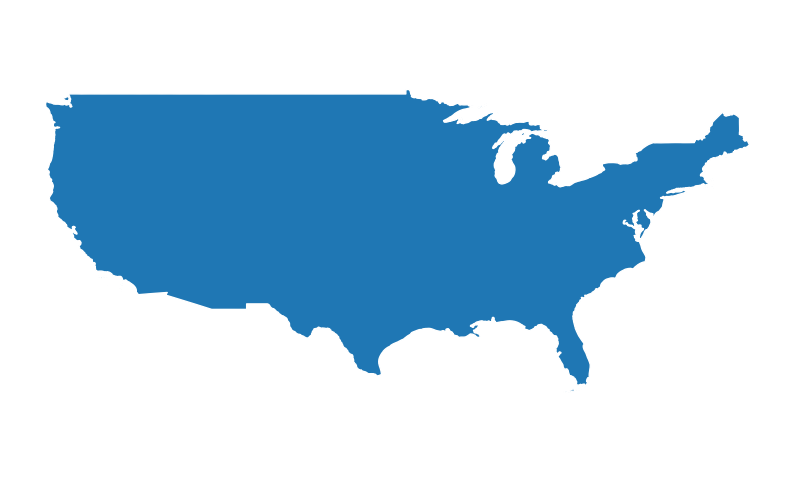

In [52]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
cont_usa.reset_index().plot(column='LSAD',
                            ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [53]:
# Select the columns that you wish to retain in the data
state_boundary = state_boundary_us[['region', 'geometry', 'ALAND', 'AWATER']]

state_boundary_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.4672 0, -118.4..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0, -77.04102 38..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0, -81.75..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0, -85.47434 34..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0, -117.21507 ..."


In [54]:
# Then summarize the quantative columns by 'sum'
regions_agg = state_boundary.dissolve(by='region', aggfunc='sum')
regions_agg

,geometry,ALAND,AWATER
region,,,
Midwest,"MULTIPOLYGON Z (((-89.12047 36.8919 0, -89.147...",1943869253244,184383393833
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0, -76.00...",869066138232,108922434345
Southeast,"MULTIPOLYGON Z (((-81.4431 30.60094 0, -81.434...",1364632039655,103876652998
Southwest,"POLYGON Z ((-94.41906 33.57722 0, -94.38805 33...",1462631530997,24217682268
West,"MULTIPOLYGON Z (((-118.3535 32.82196 0, -118.4...",2432336444730,57568049509


In [55]:
# Convert area units from square meters to hectares (divide by 10,000)
regions_agg["land_ha"] = regions_agg["ALAND"] / 10000
regions_agg["water_ha"] = regions_agg["AWATER"] / 10000
regions_agg

,geometry,ALAND,AWATER,land_ha,water_ha
region,,,,,
Midwest,"MULTIPOLYGON Z (((-89.12047 36.8919 0, -89.147...",1943869253244,184383393833,1.943869e+08,1.843834e+07
Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0, -76.00...",869066138232,108922434345,8.690661e+07,1.089224e+07
Southeast,"MULTIPOLYGON Z (((-81.4431 30.60094 0, -81.434...",1364632039655,103876652998,1.364632e+08,1.038767e+07
Southwest,"POLYGON Z ((-94.41906 33.57722 0, -94.38805 33...",1462631530997,24217682268,1.462632e+08,2.421768e+06
West,"MULTIPOLYGON Z (((-118.3535 32.82196 0, -118.4...",2432336444730,57568049509,2.432336e+08,5.756805e+06


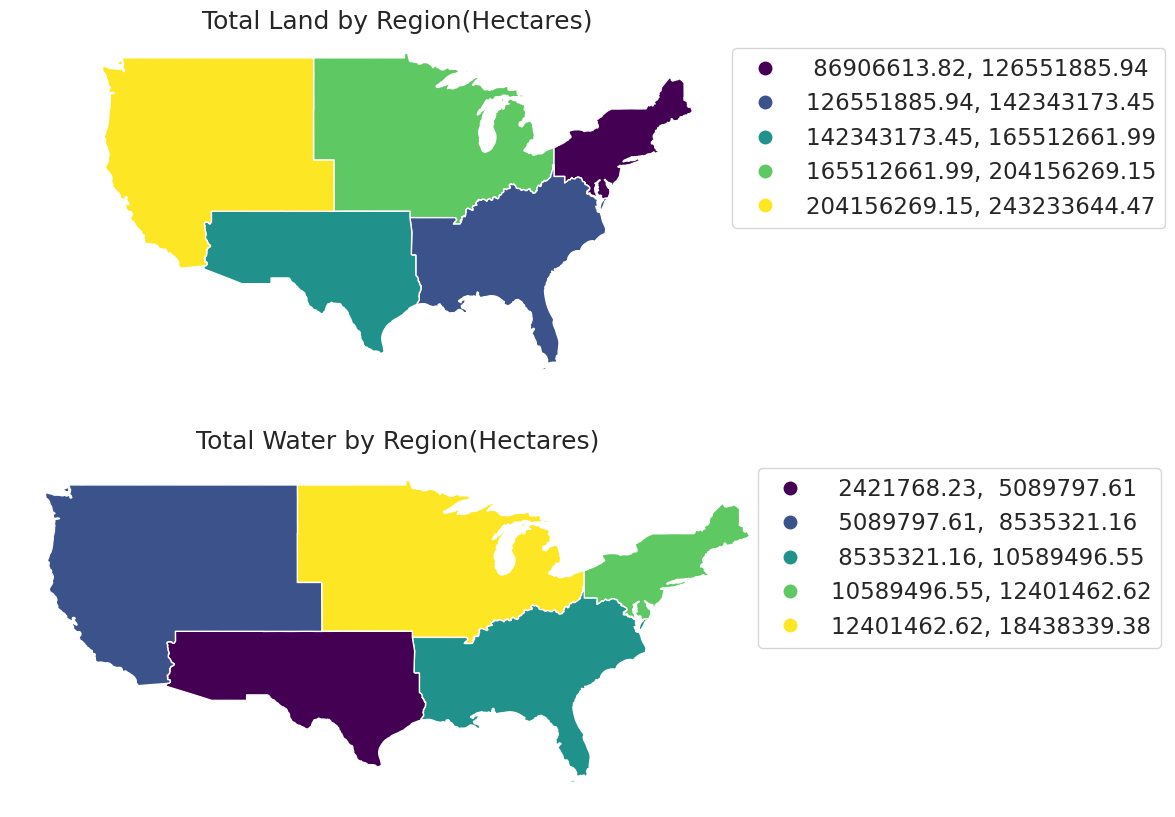

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

regions_agg.plot(column='land_ha',
                 legend=True,
                 scheme="quantiles",
                 ax=ax1)
ax1.set_title('Total Land by Region(Hectares)')

regions_agg.plot(column='water_ha',
                 scheme="quantiles",
                 legend=True,
                 ax=ax2)
ax2.set_title('Total Water by Region(Hectares)')

leg = ax1.get_legend()
leg.set_bbox_to_anchor((1.7,1))

leg = ax2.get_legend()
leg.set_bbox_to_anchor((1.5,1))
ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()